# Compare CMYK Percentage among DPIs

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import os
import sys

sys.path.append(os.path.abspath("../"))
from src.helper import prepend_zero, rgb_to_cmyk


In [15]:
df = pd.read_csv("../outputs/csv/cmyk_of_a_pdf_file_by_dpi_kmeans_clustered.csv")
df = df[df.library == 'pymupdf']
# df_clustered = pd.read_csv("../outputs/csv/cmyk_of_a_pdf_file_by_dpi_kmeans_clustered.csv")
df

,library,dpi,converting_time,page,c,m,y,k,cmy,cmyk,price
33592,pymupdf,1,0.030493,1,0.24,0.40,1.26,1.20,1.90,3.10,750
33593,pymupdf,1,0.019641,2,1.73,1.51,0.00,8.96,3.24,12.20,500
33594,pymupdf,1,0.005342,3,0.00,0.00,0.00,20.82,0.00,20.82,750
33595,pymupdf,1,0.002484,4,0.00,0.00,0.00,24.39,0.00,24.39,750
33596,pymupdf,1,0.002220,5,0.00,0.00,0.00,24.39,0.00,24.39,750
...,...,...,...,...,...,...,...,...,...,...,...
50383,pymupdf,300,1.432159,880,0.00,0.00,0.00,5.56,0.00,5.56,500
50384,pymupdf,300,1.535016,881,1.01,10.35,11.62,11.30,22.98,34.28,1500
50385,pymupdf,300,1.333026,882,0.80,1.27,1.81,1.49,3.88,5.37,500
50386,pymupdf,300,1.275315,883,2.40,26.71,30.15,11.87,59.26,71.13,2000


In [16]:
dpi_to_be_compared = [300, 200, 100, 50, 10, 5, 1]
df = df[df.dpi.isin(dpi_to_be_compared)]
df

,library,dpi,converting_time,page,c,m,y,k,cmy,cmyk,price
33592,pymupdf,1,0.030493,1,0.24,0.40,1.26,1.20,1.90,3.10,750
33593,pymupdf,1,0.019641,2,1.73,1.51,0.00,8.96,3.24,12.20,500
33594,pymupdf,1,0.005342,3,0.00,0.00,0.00,20.82,0.00,20.82,750
33595,pymupdf,1,0.002484,4,0.00,0.00,0.00,24.39,0.00,24.39,750
33596,pymupdf,1,0.002220,5,0.00,0.00,0.00,24.39,0.00,24.39,750
...,...,...,...,...,...,...,...,...,...,...,...
50383,pymupdf,300,1.432159,880,0.00,0.00,0.00,5.56,0.00,5.56,500
50384,pymupdf,300,1.535016,881,1.01,10.35,11.62,11.30,22.98,34.28,1500
50385,pymupdf,300,1.333026,882,0.80,1.27,1.81,1.49,3.88,5.37,500
50386,pymupdf,300,1.275315,883,2.40,26.71,30.15,11.87,59.26,71.13,2000


In [17]:
df['dpi'].value_counts()

dpi
1      884
5      884
10     884
50     884
100    884
200    884
300    884
Name: count, dtype: int64

In [18]:
import random

price_list = df.price.unique().tolist()
page_list = []

for price in price_list:
    pages = df[df.price == price]['page'].unique().tolist()
    page_list.append(random.sample(pages, 1)[0])

for price, page in zip(price_list, page_list):
    print(price, page)



750 19
500 626
2000 461
1000 299
1500 115


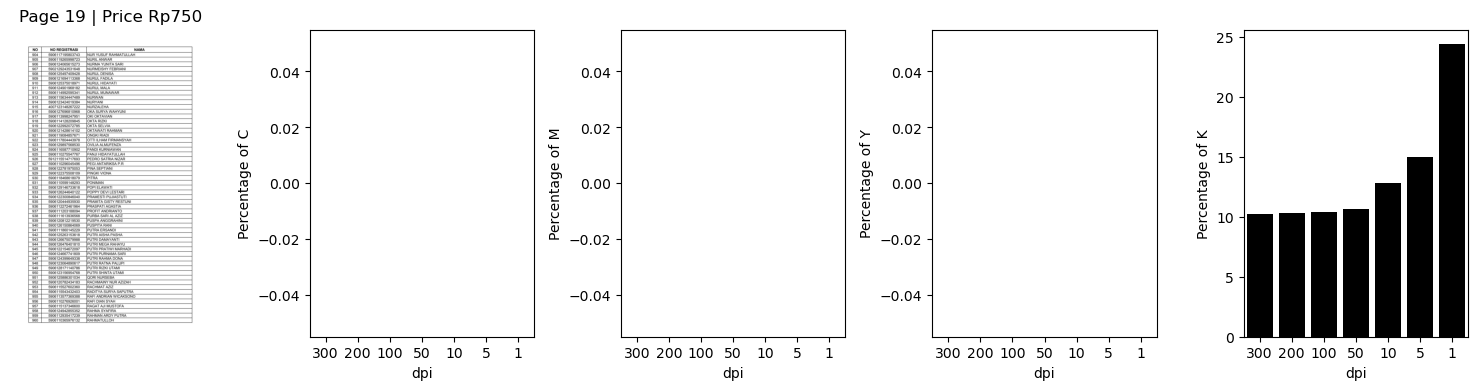

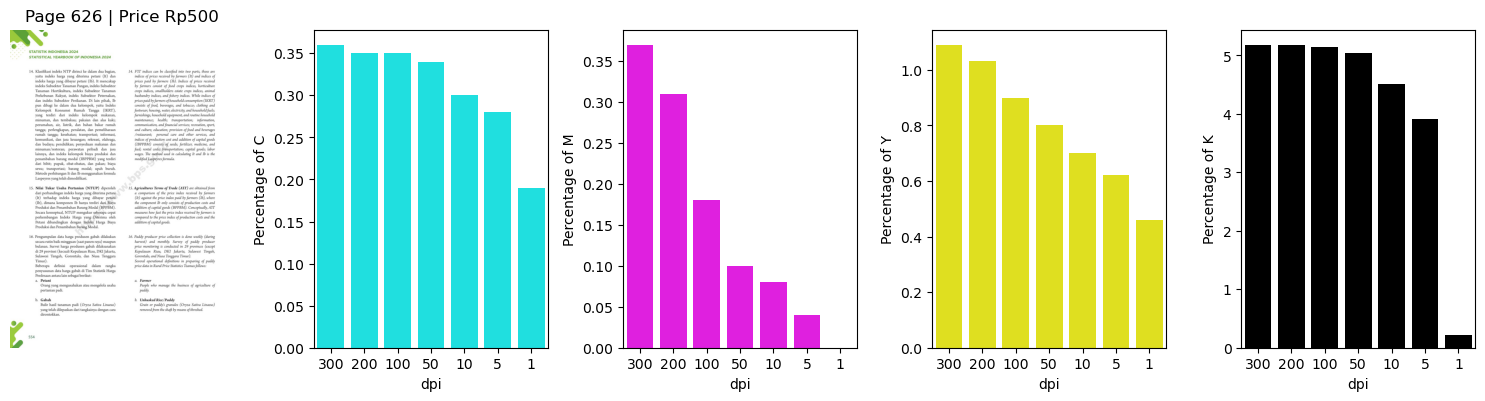

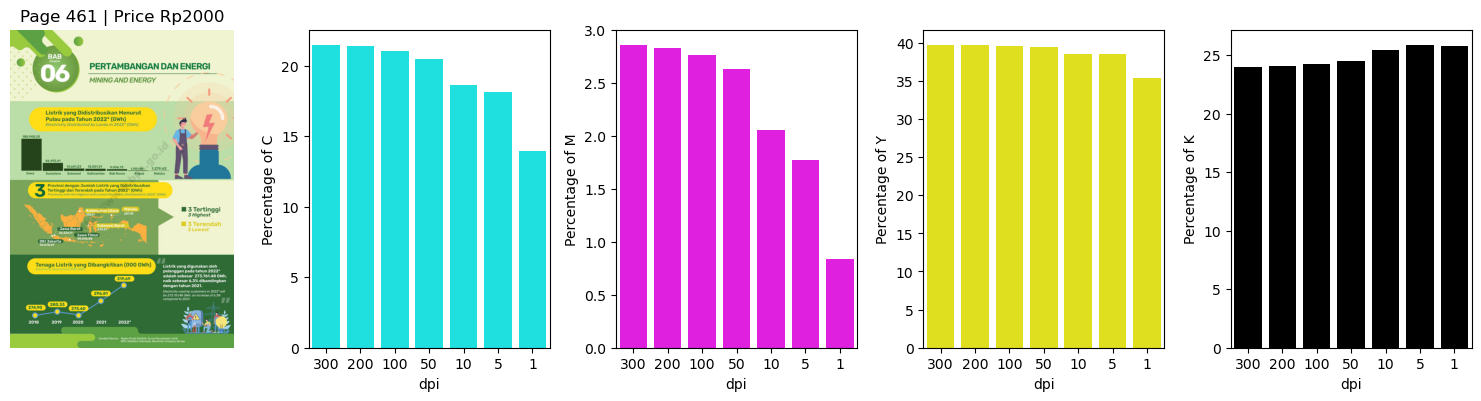

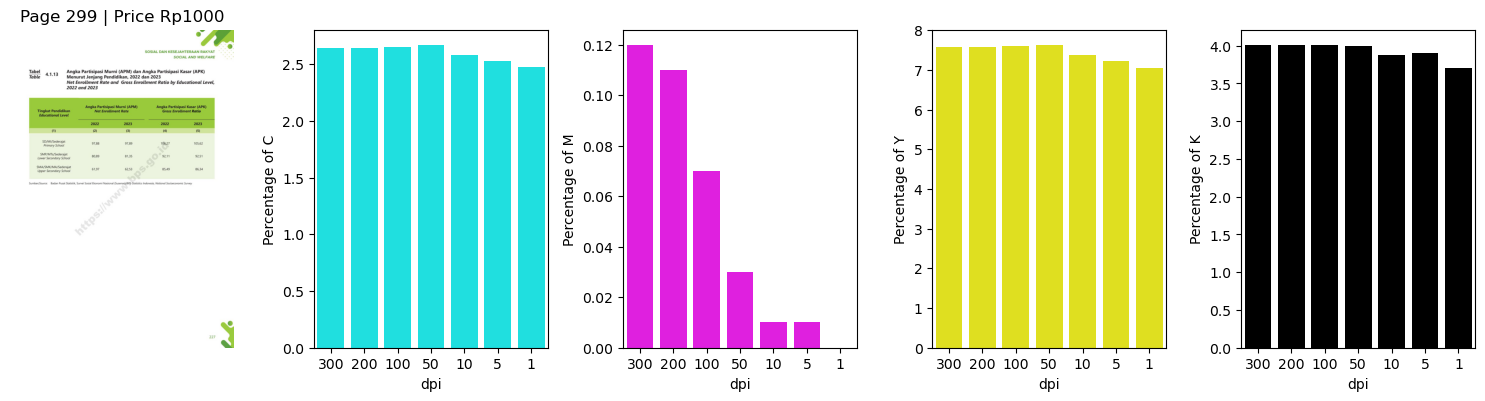

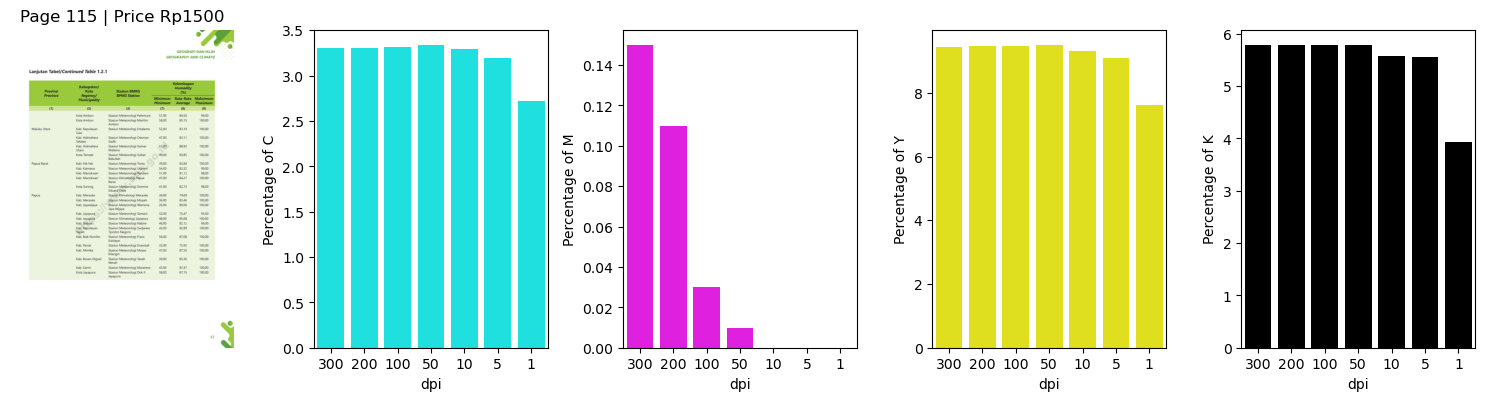

In [19]:
for price, page, i in zip(price_list, page_list, range(5)):
    fig, ax = plt.subplots(1, 5, figsize=(15, 4))

    # Ambil urutan dpi yang unik dan urutkan secara descending
    dpi_order = df[df.page == page]['dpi'].unique()
    dpi_order = sorted(dpi_order, reverse=True)
    
    sns.barplot(df[df.page == page], x='dpi', y='c', ax=ax[1], color='cyan', order=dpi_order)
    sns.barplot(df[df.page == page], x='dpi', y='m', ax=ax[2], color='magenta', order=dpi_order)
    sns.barplot(df[df.page == page], x='dpi', y='y', ax=ax[3], color='yellow', order=dpi_order)
    sns.barplot(df[df.page == page], x='dpi', y='k', ax=ax[4], color='black', order=dpi_order)
    ax[0].set_title(f"Page {page} | Price Rp{price}")
    img = plt.imread(f"../outputs/pdfium_150dpi/{prepend_zero(str(page))}")
    ax[0].imshow(img)
    ax[0].axis('off')
    
    ax[1].set_ylabel("Percentage of C")
    ax[2].set_ylabel("Percentage of M")
    ax[3].set_ylabel("Percentage of Y")
    ax[4].set_ylabel("Percentage of K")

    plt.tight_layout()
    plt.show()